# PUNTO 5 CLASIFICACION

In [7]:
import warnings
warnings.filterwarnings("ignore")

In [8]:
import pandas as pd
import numpy as np
import zipfile

In [9]:
df = pd.read_csv("C:/Users/GINA/Downloads/train_identity/train_transaction.csv", nrows=100000)

In [10]:
df.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
# Calcular el porcentaje de datos faltantes por columna
missing_percentage = df.isnull().mean()

# Filtrar las columnas que tienen más del 30% de datos faltantes
cols_to_drop = missing_percentage[missing_percentage > 0.3].index

# Eliminar esas columnas del DataFrame
df = df.drop(cols_to_drop, axis=1)

df.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,135.0,0.0,0.0,0.0,50.0,1404.0,790.0,0.0,0.0,0.0
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
df = df.drop('TransactionID', axis = 1)

In [13]:
df = df.drop('P_emaildomain', axis = 1)
object_columns = df.select_dtypes(include=['object']).columns.tolist()

# Dicotomizar las columnas
df = pd.get_dummies(df, columns=object_columns, drop_first=True)
df.head()

,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,C1,...,ProductCD_H,ProductCD_R,ProductCD_S,ProductCD_W,card4_discover,card4_mastercard,card4_visa,card6_credit,card6_debit,card6_debit or credit
0,0,86400,68.5,13926,NaN,150.0,142.0,315.0,87.0,1.0,...,False,False,False,True,True,False,False,True,False,False
1,0,86401,29.0,2755,404.0,150.0,102.0,325.0,87.0,1.0,...,False,False,False,True,False,True,False,True,False,False
2,0,86469,59.0,4663,490.0,150.0,166.0,330.0,87.0,1.0,...,False,False,False,True,False,False,True,False,True,False
3,0,86499,50.0,18132,567.0,150.0,117.0,476.0,87.0,2.0,...,False,False,False,True,False,True,False,False,True,False
4,0,86506,50.0,4497,514.0,150.0,102.0,420.0,87.0,1.0,...,True,False,False,False,False,True,False,True,False,False


In [14]:
df = df.dropna()

In [15]:
from scipy.stats import spearmanr

In [16]:
correlation_matrix, pvalue_matrix = spearmanr(df)

# Convertir las matrices en DataFrames de Pandas para una mejor manipulación
correlation_df = pd.DataFrame(correlation_matrix, columns=df.columns, index=df.columns)
pvalue_df = pd.DataFrame(pvalue_matrix, columns=df.columns, index=df.columns)

In [17]:
significant_correlation = correlation_df[pvalue_df < 0.05]

In [18]:
significant_pairs = np.argwhere(pvalue_matrix < 0.05)
pairs = [(df.columns[x], df.columns[y]) for x, y in significant_pairs if x != y and x < y]

In [19]:
pairs

[('isFraud', 'TransactionDT'),
 ('isFraud', 'TransactionAmt'),
 ('isFraud', 'card1'),
 ('isFraud', 'card3'),
 ('isFraud', 'addr1'),
 ('isFraud', 'addr2'),
 ('isFraud', 'C1'),
 ('isFraud', 'C2'),
 ('isFraud', 'C3'),
 ('isFraud', 'C4'),
 ('isFraud', 'C5'),
 ('isFraud', 'C6'),
 ('isFraud', 'C7'),
 ('isFraud', 'C8'),
 ('isFraud', 'C10'),
 ('isFraud', 'C11'),
 ('isFraud', 'C12'),
 ('isFraud', 'C13'),
 ('isFraud', 'C14'),
 ('isFraud', 'D1'),
 ('isFraud', 'V95'),
 ('isFraud', 'V96'),
 ('isFraud', 'V97'),
 ('isFraud', 'V98'),
 ('isFraud', 'V99'),
 ('isFraud', 'V100'),
 ('isFraud', 'V101'),
 ('isFraud', 'V102'),
 ('isFraud', 'V103'),
 ('isFraud', 'V104'),
 ('isFraud', 'V105'),
 ('isFraud', 'V106'),
 ('isFraud', 'V108'),
 ('isFraud', 'V109'),
 ('isFraud', 'V110'),
 ('isFraud', 'V111'),
 ('isFraud', 'V112'),
 ('isFraud', 'V113'),
 ('isFraud', 'V114'),
 ('isFraud', 'V115'),
 ('isFraud', 'V116'),
 ('isFraud', 'V117'),
 ('isFraud', 'V118'),
 ('isFraud', 'V119'),
 ('isFraud', 'V120'),
 ('isFraud', 'V

In [20]:
df = df.drop(['C1','C2', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14',  'D1',  'V96', 'V97', 
              'V98', 'V99', 'V100', 'V102', 'V103', 'V104', 'V105', 'V106', 'V108', 'V109', 'V111', 'V112', 'V113', 
              'V114', 'V115', 'V116', 'V117', 'V118', 'V119', 'V120', 'V121', 'V122', 'V123', 'V124', 'V125', 'V127', 
              'V128', 'V129', 'V130', 'V131', 'V133', 'V134', 'V135', 'V136', 'V137', 'V279', 'V280', 'V281', 'V282', 
              'V283', 'V284', 'V285', 'V286', 'V287', 'V288', 'V289','V291','V292','V293', 'V294','V295','V296','V297',
              'V298','V299','V300','V301','V302','V303','V304','V306','V307','V308','V309','V310','V311','V312','V313',
              'V314','V315','V316','V317', 'V318',  'V319',  'V320',  'V321'], axis = 1)

In [21]:
df.head()

,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,C3,...,ProductCD_H,ProductCD_R,ProductCD_S,ProductCD_W,card4_discover,card4_mastercard,card4_visa,card6_credit,card6_debit,card6_debit or credit
1,0,86401,29.0,2755,404.0,150.0,102.0,325.0,87.0,0.0,...,False,False,False,True,False,True,False,True,False,False
2,0,86469,59.0,4663,490.0,150.0,166.0,330.0,87.0,0.0,...,False,False,False,True,False,False,True,False,True,False
3,0,86499,50.0,18132,567.0,150.0,117.0,476.0,87.0,0.0,...,False,False,False,True,False,True,False,False,True,False
4,0,86506,50.0,4497,514.0,150.0,102.0,420.0,87.0,0.0,...,True,False,False,False,False,True,False,True,False,False
5,0,86510,49.0,5937,555.0,150.0,226.0,272.0,87.0,0.0,...,False,False,False,True,False,False,True,False,True,False


In [22]:
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.metrics import average_precision_score

from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import StratifiedKFold
from sklearn import preprocessing 

from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

In [23]:
Y = df.isFraud
X = df.drop('isFraud', axis = 1)

In [24]:
# PCA
pca_pipe = make_pipeline(StandardScaler(), PCA())
pca_pipe.fit(X)

# Se extrae el modelo entrenado del pipeline
modelo_pca = pca_pipe.named_steps['pca']

In [25]:
pip install plotly


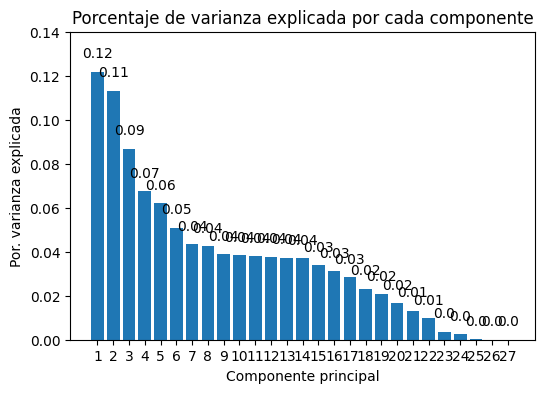

In [26]:
import matplotlib.pyplot as plt
import plotly.express as px

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.bar(
    x      = np.arange(modelo_pca.n_components_) + 1,
    height = modelo_pca.explained_variance_ratio_
)

for x, y in zip(np.arange(len(X.columns)) + 1, modelo_pca.explained_variance_ratio_):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_ylim(0, 0.14)
ax.set_title('Porcentaje de varianza explicada por cada componente')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza explicada');

Esta gráfica es una representación visual que  permite evaluar la importancia de cada componente principal en mi análisis de PCA. se puede observar cuánto contribuye cada componente a la variabilidad total de los datos. Los componentes principales con porcentajes de varianza explicada más altos son los más informativos y capturan la mayor parte de la variabilidad en los datos originales. En este caso estos componentes son (1-10). 

Analizando la grafica nos damos cuenta que a los primeros componentes poseen la varianza mas alta y los ultimos casi no alcanzan a poseerla. 

In [27]:
valores_propios_df = pd.DataFrame({'Componente': range(1, modelo_pca.n_components_+1),
                                   'Valor propio': modelo_pca.explained_variance_})

In [28]:
len(valores_propios_df[valores_propios_df['Valor propio'] > 1])

10

In [29]:
X_transformado = modelo_pca.transform(X)[:, :10]

In [30]:
XPCA = pd.DataFrame(X_transformado, 
                    columns=['COMP1', 'COMP2','COMP3','COMP4','COMP5','COMP6','COMP7','COMP8','COMP9','COMP10'])
XPCA.head()

,COMP1,COMP2,COMP3,COMP4,COMP5,COMP6,COMP7,COMP8,COMP9,COMP10
0,7270.221132,-10204.657514,-10728.657853,-12683.980149,-10965.187643,4106.778046,-37915.994105,32617.942339,7919.577200,-2837.642088
1,7270.811792,-10179.889334,-10706.442130,-12687.141398,-11041.876031,4042.033110,-37314.567559,33775.221734,7883.958913,-2589.549358
2,7274.632928,-9960.082204,-10223.021528,-12640.725869,-11479.731149,3444.861280,-33093.943677,41807.014325,7435.038865,-745.391059
3,7280.593838,-10202.941367,-10695.540764,-12688.354501,-11041.221998,4047.612231,-37367.976909,33705.410414,7849.436489,-2639.101880
4,7267.407667,-10161.154717,-10696.435135,-12685.717895,-11089.967620,3985.950668,-36924.893287,34539.385255,7893.014570,-2411.843327


In [31]:
X = XPCA

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=22, stratify = Y)

In [33]:
y_train.mean()

0.01960608505932634

In [34]:
y_test.mean()

0.019590263146097638

In [35]:
from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification
from collections import Counter

In [36]:
sm = SMOTE(random_state=110322)
X_train, y_train = sm.fit_resample(X_train, y_train)

In [37]:
y_train.mean()

0.5

In [38]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [39]:
# Definir el pipeline
knn_pipeline = Pipeline([
    ("scaler", StandardScaler()),  # Es útil escalar para KNN
    ("knn", KNeighborsClassifier())
])

# Parámetros para el GridSearch
knn_params = {
    "knn__n_neighbors": [1, 3, 5, 7, 9, 11],
    "knn__weights": ["uniform", "distance"],
    "knn__metric": ["euclidean", "manhattan"]
}

knn_grid = GridSearchCV(knn_pipeline, knn_params, scoring='roc_auc', cv=5)
knn_grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__metric': ['euclidean', 'manhattan'],
                         'knn__n_neighbors': [1, 3, 5, 7, 9, 11],
                         'knn__weights': ['uniform', 'distance']},
             scoring='roc_auc')

In [40]:
import pickle

# Regresión Logística
with open('knn_grid.pkl', 'wb') as archivo:
    pickle.dump(knn_grid, archivo)
    

In [41]:
from sklearn.naive_bayes import GaussianNB

# Como Naive Bayes no tiene muchos parámetros para optimizar, puedes hacer un pipeline simple
nb_pipeline = Pipeline([
    ("nb", GaussianNB())
])

nb_params = {}  # No hay parámetros específicos para optimizar en GaussianNB

nb_grid = GridSearchCV(nb_pipeline, nb_params, scoring='roc_auc', cv=5)
nb_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Pipeline(steps=[('nb', GaussianNB())]),
             param_grid={}, scoring='roc_auc')

In [42]:
with open('nb_grid.pkl', 'wb') as archivo:
    pickle.dump(nb_grid, archivo)

In [43]:
import xgboost as xgb

xgb_pipeline = Pipeline([
    ("xgb", xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss'))
])

xgb_params = {
    "xgb__learning_rate": [0.01, 0.1, 0.5],
    "xgb__n_estimators": [50, 100, 200],
    "xgb__max_depth": [3, 5, 7],
}

xgb_grid = GridSearchCV(xgb_pipeline, xgb_params, scoring='roc_auc', cv=5)
xgb_grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('xgb',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      device=None,
                                                      early_stopping_rounds=None,
                                                      enable_categorical=False,
                                                      eval_metric='logloss',
                                                      feature_types=None,
                                                      gamma=None,
                                                      grow_policy=None,
                                                      importance_type=None,
                                                      interaction_constrai...
                                                      max_cat_to_onehot=None,
                                                      max_delta_step=None,
                                                      max_depth=None,
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      random_state=None, ...))]),
             param_grid={'xgb__learning_rate': [0.01, 0.1, 0.5],
                         'xgb__max_depth': [3, 5, 7],
                         'xgb__n_estimators': [50, 100, 200]},
             scoring='roc_auc')

In [44]:
with open('xgb_grid.pkl', 'wb') as archivo:
    pickle.dump(xgb_grid, archivo)

In [45]:
import pickle

In [46]:
with open('knn_grid.pkl', 'rb') as archivo:
    knn_grid = pickle.load(archivo)
knn_grid

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__metric': ['euclidean', 'manhattan'],
                         'knn__n_neighbors': [1, 3, 5, 7, 9, 11],
                         'knn__weights': ['uniform', 'distance']},
             scoring='roc_auc')

In [47]:
with open('nb_grid.pkl', 'rb') as archivo:
    nb_grid = pickle.load(archivo)
nb_grid

GridSearchCV(cv=5, estimator=Pipeline(steps=[('nb', GaussianNB())]),
             param_grid={}, scoring='roc_auc')

In [48]:
with open('xgb_grid.pkl', 'rb') as archivo:
    xgb_grid = pickle.load(archivo)
xgb_grid

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('xgb',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      device=None,
                                                      early_stopping_rounds=None,
                                                      enable_categorical=False,
                                                      eval_metric='logloss',
                                                      feature_types=None,
                                                      gamma=None,
                                                      grow_policy=None,
                                                      importance_type=None,
                                                      interaction_constrai...
                                                      max_cat_to_onehot=None,
                                                      max_delta_step=None,
                                                      max_depth=None,
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      random_state=None, ...))]),
             param_grid={'xgb__learning_rate': [0.01, 0.1, 0.5],
                         'xgb__max_depth': [3, 5, 7],
                         'xgb__n_estimators': [50, 100, 200]},
             scoring='roc_auc')

In [51]:
import pandas as pd
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score

# Inicializar el dataframe para almacenar los resultados
results_df = pd.DataFrame(columns=['Modelo', 'Precision', 'Recall', 'F1-score', 'Accuracy', 'AUC'])

# KNN
knn_report = classification_report(y_test, knn_grid.predict(X_test), output_dict=True)
knn_results = {'Modelo': 'KNN',
               'Precision': knn_report['weighted avg']['precision'],
               'Recall': knn_report['weighted avg']['recall'],
               'F1-score': knn_report['weighted avg']['f1-score'],
               'Accuracy': accuracy_score(y_test, knn_grid.predict(X_test)),
               'AUC': roc_auc_score(y_test, knn_grid.predict_proba(X_test)[:, 1])}
results_df = pd.concat([results_df, pd.DataFrame([knn_results])], ignore_index=True)

# Naive Bayes
nb_report = classification_report(y_test, nb_grid.predict(X_test), output_dict=True)
nb_results = {'Modelo': 'Naive Bayes',
              'Precision': nb_report['weighted avg']['precision'],
              'Recall': nb_report['weighted avg']['recall'],
              'F1-score': nb_report['weighted avg']['f1-score'],
              'Accuracy': accuracy_score(y_test, nb_grid.predict(X_test)),
              'AUC': roc_auc_score(y_test, nb_grid.predict_proba(X_test)[:, 1])}
results_df = pd.concat([results_df, pd.DataFrame([nb_results])], ignore_index=True)

# XGBoost
xgb_report = classification_report(y_test, xgb_grid.predict(X_test), output_dict=True)
xgb_results = {'Modelo': 'XGBoost',
               'Precision': xgb_report['weighted avg']['precision'],
               'Recall': xgb_report['weighted avg']['recall'],
               'F1-score': xgb_report['weighted avg']['f1-score'],
               'Accuracy': accuracy_score(y_test, xgb_grid.predict(X_test)),
               'AUC': roc_auc_score(y_test, xgb_grid.predict_proba(X_test)[:, 1])}
results_df = pd.concat([results_df, pd.DataFrame([xgb_results])], ignore_index=True)

# Mostrar el dataframe con los resultados
print("MÉTRICAS DE DESEMPEÑO CON OPTIMIZACIÓN GRIDSEARCH Y CROSS VALIDATION")
print("-------------------------------------------------------------------")
results_df


MÉTRICAS DE DESEMPEÑO CON OPTIMIZACIÓN GRIDSEARCH Y CROSS VALIDATION
-------------------------------------------------------------------


,Modelo,Precision,Recall,F1-score,Accuracy,AUC
0,KNN,0.968382,0.798314,0.870950,0.798314,0.660703
1,Naive Bayes,0.964474,0.486663,0.637392,0.486663,0.534754
2,XGBoost,0.966639,0.789438,0.865384,0.789438,0.639752


KNN tiene una alta precisión de aproximadamente 0.968, lo que indica que la mayoría de las predicciones positivas son correctas.
Naive Bayes tiene una precisión similar de alrededor de 0.964.
XGBoost también tiene una alta precisión, alrededor de 0.967.


KNN tiene un recall de alrededor de 0.798, lo que significa que captura aproximadamente el 79.8% de los casos positivos reales.
Naive Bayes tiene un recall significativamente menor, alrededor de 0.487.
XGBoost tiene un recall similar al de KNN, alrededor de 0.789.


KNN tiene un F1-score de alrededor de 0.871, lo que sugiere un buen equilibrio entre precisión y recall.
Naive Bayes tiene un F1-score más bajo, alrededor de 0.637, lo que indica un desequilibrio entre precisión y recall.
XGBoost tiene un F1-score similar al de KNN, alrededor de 0.865.

KNN y XGBoost tienen una alta precisión, ambas alrededor de 0.789, lo que significa que tienen un alto porcentaje de predicciones correctas en general.
Naive Bayes tiene una precisión significativamente más baja, alrededor de 0.487, lo que indica un desequilibrio en la clasificación.

KNN tiene un AUC de aproximadamente 0.661, lo que indica un rendimiento moderado en la capacidad de discriminación.
Naive Bayes tiene un AUC más bajo, alrededor de 0.535, lo que sugiere un rendimiento inferior en la discriminación.
XGBoost tiene un AUC de alrededor de 0.640, que es similar al de KNN y sugiere un rendimiento moderado en la discriminación.

En resumen, los resultados indican que KNN y XGBoost tienen un mejor desempeño general en términos de precisión, recall, F1-score y AUC en comparación con Naive Bayes.

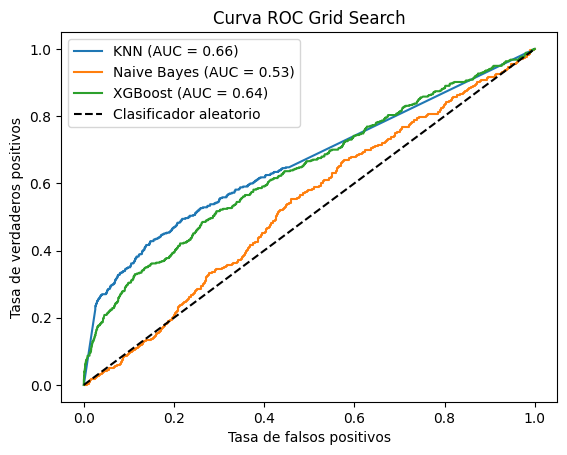

In [52]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Definir los modelos de clasificación y sus nombres
models = [knn_grid, nb_grid, xgb_grid] 
model_names = ['KNN', 'Naive Bayes', "XGBoost"] 

# Inicializar la figura
fig, ax = plt.subplots()

# Iterar sobre los modelos de clasificación y graficar sus curvas ROC
for i, model in enumerate(models):
    
    if hasattr(model, "predict_proba"):
        # Calcular la curva ROC y el área bajo la curva (AUC)
        fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
        roc_auc = auc(fpr, tpr)
    elif hasattr(model, "decision_function"):
        # Calcular la curva ROC y el área bajo la curva (AUC)
        fpr, tpr, thresholds = roc_curve(y_test, model.decision_function(X_test))
        roc_auc = auc(fpr, tpr)
    else:
        roc_auc = roc_auc_score(y_test, model.predict(X_test), average='weighted')
    
    # Graficar la curva ROC
    ax.plot(fpr, tpr, label=f'{model_names[i]} (AUC = {roc_auc:.2f})')
    
    # Agregar la línea de referencia diagonal
ax.plot([0, 1], [0, 1], 'k--', label='Clasificador aleatorio')

# Configurar las etiquetas y leyendas del gráfico
ax.set_xlabel('Tasa de falsos positivos')
ax.set_ylabel('Tasa de verdaderos positivos')
ax.set_title('Curva ROC Grid Search')
ax.legend()

# Mostrar la figura
plt.show()

La curva ROC muestra la relación entre la tasa de verdaderos positivos (Sensibilidad) y la tasa de falsos positivos (1 - Especificidad) para diferentes umbrales de decisión. Un AUC más alto indica un mejor rendimiento del modelo en la clasificación binaria, ya que representa la capacidad del modelo para distinguir entre las clases positiva y negativa.

Este gráfico me permite comparar visualmente el rendimiento de los modelos y seleccionar el que tenga la curva ROC más cercana a la esquina superior izquierda (ideal) y, por lo tanto, un AUC más alto. 

Asi, al analizar la grafica se puede concluir que el modelo KNN es el que posee un mejor rendimiento al tener un AUC mas alto. 





